<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/3DV/labs/cv08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8th Lab - Stereo Vision

In [ ]:
import sympy as sp
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display

## Visualizing PointCloud data

To finish the last exercise you need to visualize the obtained 3D points. You can use this function to create an interactive plot using plotly.

In [ ]:
from typing import Optional
import plotly.graph_objects as go


# code taken from: https://github.com/cvg/Hierarchical-Localization/blob/master/hloc/utils/viz_3d.py


def init_figure(height: int = 800) -> go.Figure:
    """Initialize a 3D figure."""
    fig = go.Figure()
    axes = dict(
        visible=False,
        showbackground=False,
        showgrid=False,
        showline=False,
        showticklabels=True,
        autorange=True,
    )
    fig.update_layout(
        template="plotly_dark",
        height=height,
        scene_camera=dict(
            eye=dict(x=0., y=-.1, z=-2),
            up=dict(x=0, y=-1., z=0),
            projection=dict(type="orthographic")),
        scene=dict(
            xaxis=axes,
            yaxis=axes,
            zaxis=axes,
            aspectmode='data',
            dragmode='orbit',
        ),
        margin=dict(l=0, r=0, b=0, t=0, pad=0),
        legend=dict(
            orientation="h",
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.1
        ),
    )
    return fig


def plot_points(
        fig: go.Figure,
        pts: np.ndarray,
        color: str = 'rgba(255, 0, 0, 1)',
        ps: int = 2,
        colorscale: Optional[str] = None,
        name: Optional[str] = None):
    """Plot a set of 3D points."""
    x, y, z = pts.T
    tr = go.Scatter3d(
        x=x, y=y, z=z, mode='markers', name=name, legendgroup=name,
        marker=dict(
            size=ps, color=color, line_width=0.0, colorscale=colorscale))
    fig.add_trace(tr)


def plot_interactive_pointcloud(xyz, rgb):
  # plots a plotly pointcloud
  # params:
  # xyz - n x 3 - array with 3D coordinates of points
  # rgb - n x 3 - array with RGB triplets in 0-255
  fig = init_figure()
  plot_points(fig, xyz, color=rgb)
  fig.show()

## Exercise - Generating 3D Pointcloud from Stereo (3 points)

In this exercise you will use two stereo images to obtain a pointcloud. We will first download the images. In the code below you can see how we can obtain a disparity map. Note that we do have to convert the map to float and then divide it by 16 to get meaningful results (You may ask why, the answer is - OpenCV).

After getting the diparity map you should generate points in the real-world coordinates. The distance between the camera centers is 5cm. Use this information to generate triplets (X, Y, Z). Note that the X, Y in these triplets are not the same as image coordinates. Do not include points with disparity -1 as this indicates that there was no match. Also do not include points with 0 disparity. Also prepare the rgb triplets so your pointcloud has colors.

*Note:* When displaying the pointcloud only display every 500th point or so. It is also beneficial to filter points that are estimated as too far to be able to better see the whole pointcloud in the plot.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv08_img1.jpg
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv08_img2.jpg

--2023-04-05 14:13:55--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv08_img1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57221 (56K) [image/jpeg]
Saving to: ‘cv08_img1.jpg.5’

cv08_img1.jpg.5     100%[===================>]  55.88K  --.-KB/s    in 0.008s  

2023-04-05 14:13:55 (6.75 MB/s) - ‘cv08_img1.jpg.5’ saved [57221/57221]

--2023-04-05 14:13:55--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv08_img2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57583 (

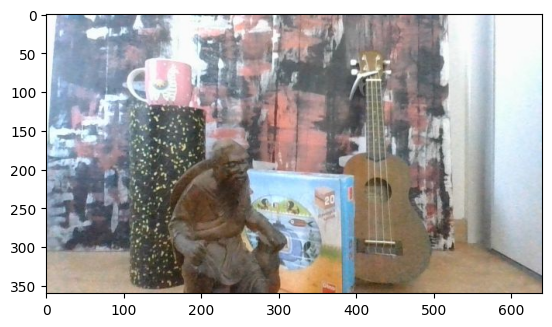

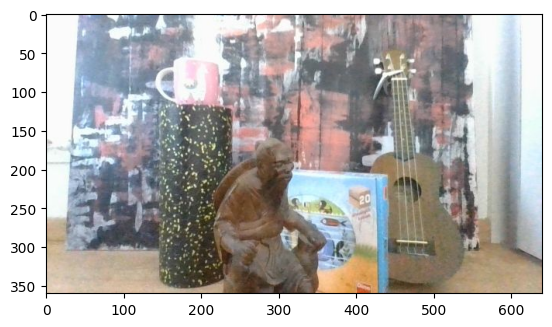

In [ ]:
img1 = cv2.imread('cv08_img1.jpg')
img2 = cv2.imread('cv08_img2.jpg')

plt.imshow(img1[:, :, ::-1])
plt.show()
plt.imshow(img2[:, :, ::-1])
plt.show()


gt_K = np.array([[380, 0, 320.5], [0, 380, 180.5], [0,0,1]])

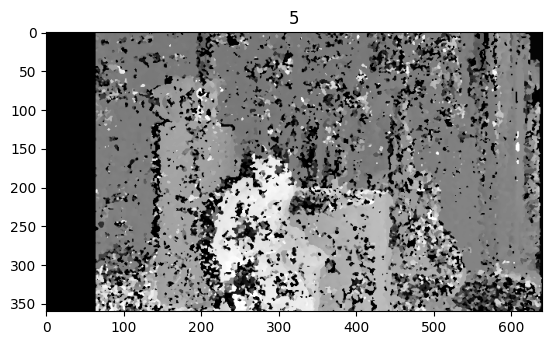

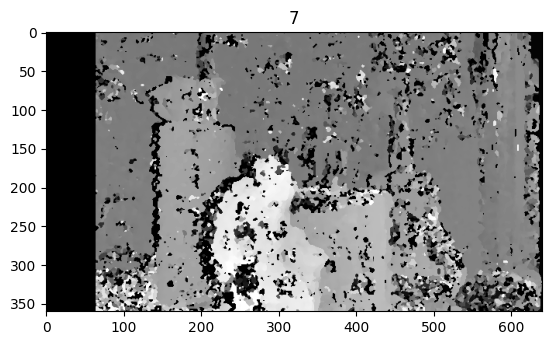

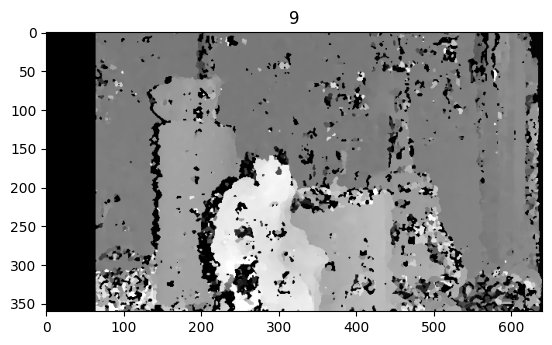

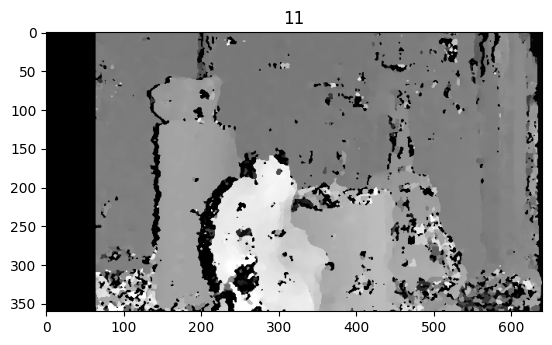

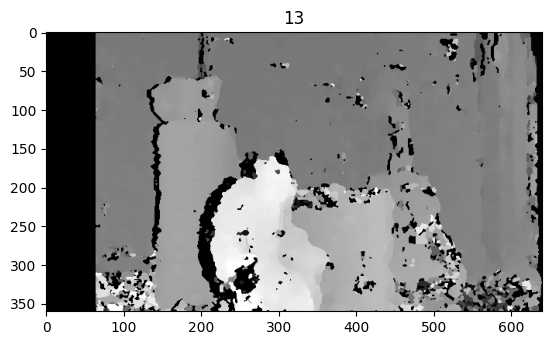

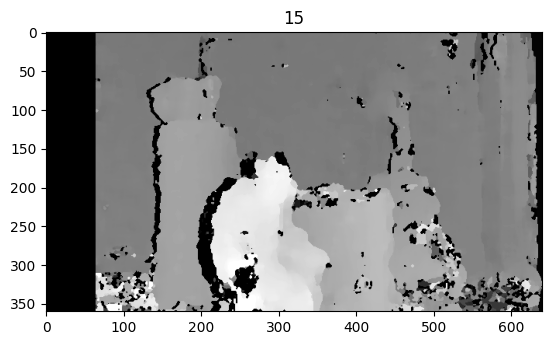

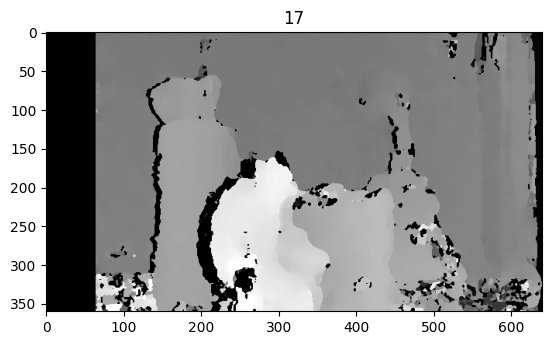

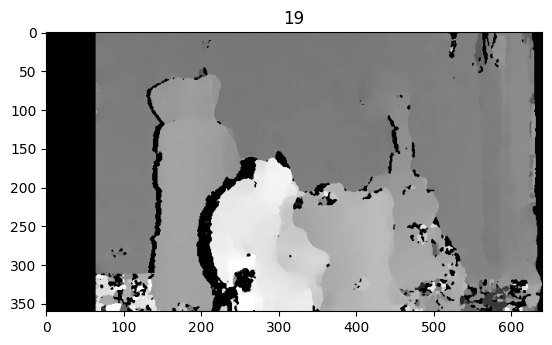

In [ ]:
for win in range(5, 21, 2):
  matcher = cv2.StereoSGBM.create(0, 64, win, mode=cv2.StereoSGBM_MODE_HH)
  disparity = matcher.compute(cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY),cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)).astype(np.float32) / 16.0
  plt.imshow(disparity, cmap='gray')
  plt.title(win)
  plt.show()

In [ ]:
...

(193558, 3)
(193558, 3)


## Exercise - Stereo Rectification (2 points)

In this exercise we will also try to find disparity maps, but this time we will use two images that need to be rectified. We will use the same images we have used since the 5th lab.

To find rotate the views we could use the equations from the lecture, but we can also opt for methods implemented in OpenCV. You can use either the `cv2.stereoRectify` of `cv2.stereoRectifyUncalibrated`. You can check out the documentation for both functions [here](https://docs.opencv.org/4.7.0/d9/d0c/group__calib3d.html).

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_1.png
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_2.png
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_imgs_correspondences.npy

--2023-04-05 14:14:04--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494694 (483K) [image/png]
Saving to: ‘cv05_img_1.png.10’

cv05_img_1.png.10   100%[===================>] 483.10K  --.-KB/s    in 0.03s   

2023-04-05 14:14:04 (13.5 MB/s) - ‘cv05_img_1.png.10’ saved [494694/494694]

--2023-04-05 14:14:04--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

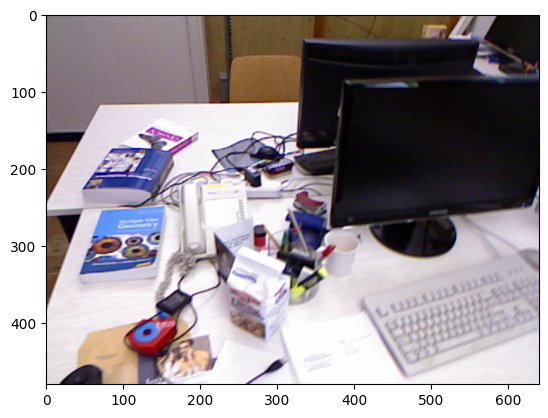

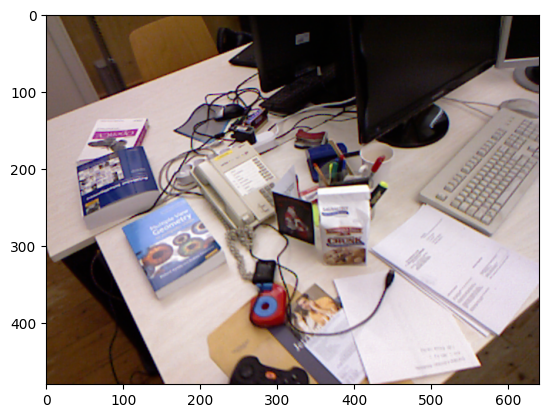

In [ ]:
img1 = cv2.imread('cv05_img_1.png')
img2 = cv2.imread('cv05_img_2.png')

fx = 525.0  # focal length x
fy = 525.0  # focal length y
cx = 319.5  # optical center x
cy = 239.5  # optical center y
gt_K = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])

plt.imshow(img1[:, :, ::-1])
plt.show()
plt.imshow(img2[:, :, ::-1])
plt.show()

pq = np.load('cv05_imgs_correspondences.npy')
p = pq[:, :2]
q = pq[:, 2:]

In [ ]:
def rectify(img1, img2, p, q):
  # params:
  # img1 - color image 1
  # img2 - color image 2
  # p - N x 2 points in image 1
  # q - N x 2 points in image 2
  # returns:
  # img1_w - rectified image 1
  # img2_w - rectified image 2
  
  ...

  return img1, img2


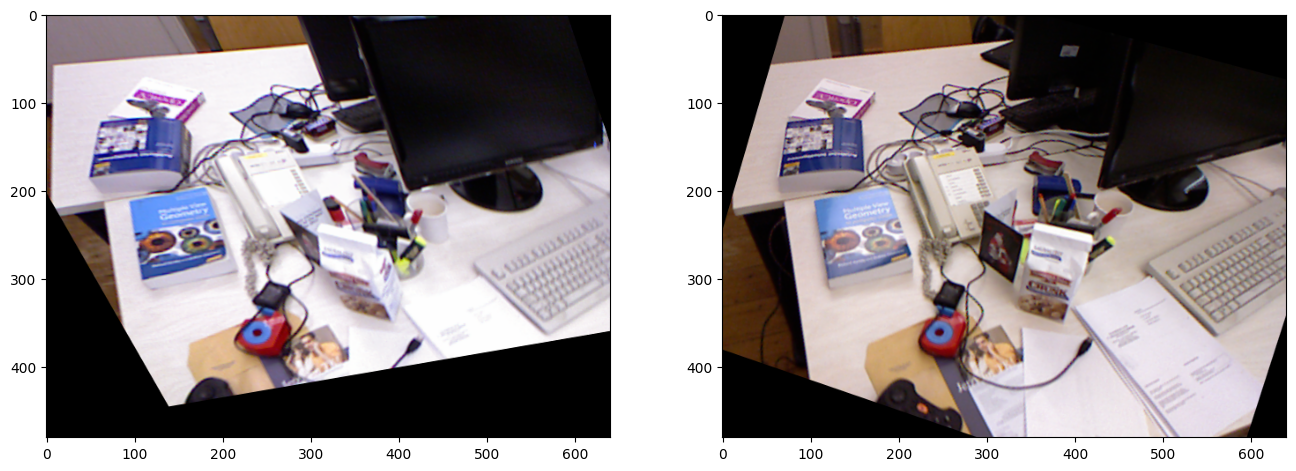

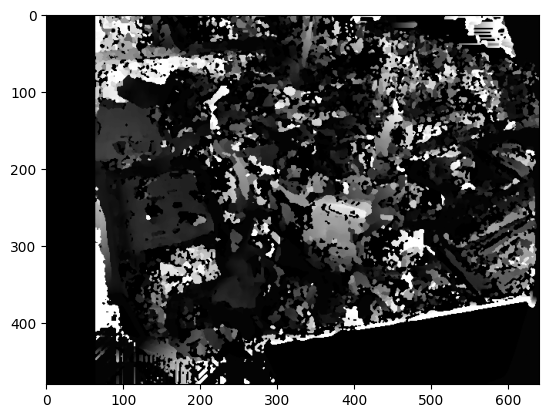

In [ ]:
img1_w, img2_w = rectify(img1, img2, p, q)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 9))
ax1.imshow(img1_w[:, :, ::-1])
ax2.imshow(img2_w[:, :, ::-1])
plt.show()

matcher = cv2.StereoSGBM.create(0, 64, 11, mode=cv2.StereoSGBM_MODE_HH)
disparity = matcher.compute(cv2.cvtColor(img2_w, cv2.COLOR_RGB2GRAY),cv2.cvtColor(img1_w, cv2.COLOR_RGB2GRAY)).astype(np.float32) / 16.0

plt.imshow(disparity, cmap='gray')